In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

## Read data

In [2]:
import ast

In [3]:
data = pd.read_csv('../data/tweets_maga/data_merged.csv', index_col=0)
# convert tokens column from string to list
data['tokens'] = data.tokens.apply(lambda l: ast.literal_eval(l))
data

,author_name,created_at,id,text,tokens
0,RealPatriot,2019-10-01 00:37:21,1178831229963116544,i’m confused is this a new “greatest” or the ...,"[confus, new, greatest, old, scandal, hard, fo..."
1,Teresa murray⭐⭐⭐ CIA #fakewistleblower 😡,2019-10-01 00:37:20,1178831224191832067,i'm not yet tired of winning sir,"[yet, tire, win, sir]"
2,GOPKnowsBest,2019-10-01 00:37:17,1178831213571629057,you are the true patriots if antifa physica...,"[true, patriot, antifa, physic, assault, way, ..."
3,Peter Dunbar,2019-10-01 00:37:15,1178831204151226368,it is amazing to watch throw his reputation d...,"[amaz, watch, throw, reput, toilet, guess, som..."
4,AtlanticCity Deplorable,2019-10-01 00:37:04,1178831160635514880,whooooohooooo i’m so excited for you,[excit]
5,Michael O'Grady,2019-10-01 00:36:58,1178831134156820480,lied about wikileaks in the grand-jury redact...,"[lie, wikileak, redact, special, counsel, repo..."
6,Lynn McCracken,2019-10-01 00:36:43,1178831070067924992,never polled and don't know anyone that has,"[never, poll, know, anyon]"
7,U R Busted,2019-10-01 00:36:41,1178831062304202754,needs to get off their ass and put their foot...,"[need, get, ass, put, foot, antifa, thing, cro..."
8,McQ,2019-10-01 00:36:39,1178831051881418757,beautiful,[beauti]
9,SJ 🌟🌟🌟,2019-10-01 00:36:27,1178831004485636096,did mean this october maybe is onto somethi...,"[mean, octob, mayb, onto, someth, regard, horr..."


## Build network

In [4]:
import itertools

In [5]:
G = nx.Graph()

for token_list in tqdm(data.tokens):
    
    for edge in itertools.combinations(token_list, 2):
        w = G.get_edge_data(*edge, default={'weight':0})['weight'] + 1
        G.add_edge(*edge, weight=w)

G = nx.convert_node_labels_to_integers(G, label_attribute='label')
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 7183
Number of edges: 1060025
Average degree: 295.1483


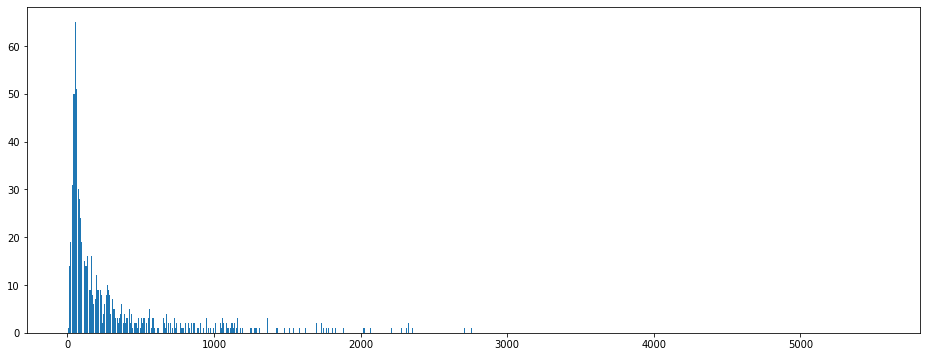

In [17]:
hist = nx.degree_histogram(G)

plt.figure(figsize=(16,6))
plt.bar(range(len(hist)), hist)

plt.show()

In [23]:
np.median([deg for node, deg in G.degree(weight='weight')])

155.0

## Find communities

In [109]:
from networkx.algorithms.community import *

### Greedy modularity

In [75]:
comms = list(greedy_m odularity_communities(G))

In [77]:
comms

[frozenset({'pimp',
            'bowl',
            'tweedlede',
            'fewer',
            'cure',
            'wednesday',
            'batsh',
            'autocrat',
            'hip',
            'proposals',
            'protestbut',
            'scari',
            'dalton',
            'nonpartisan',
            'anti-nra',
            'infrequ',
            'nbachina',
            '9-30-',
            'againimpeach',
            'tfw',
            'billfold',
            'conductor',
            'chruch',
            'debilit',
            'americansmoron',
            'rispon',
            'chum',
            'help',
            'meantim',
            'summit',
            'dioxid',
            'alaskaalway',
            'obc',
            'god',
            'goldenshow',
            'presidentrememb',
            'terroriststhos',
            'awaken',
            'annal',
            "streetwe'r",
            'good',
            'neighbor',
            'recruit',
    

### Girwan-Newman

In [113]:
comms_gn = girvan_newman(G)

In [114]:
k = 5
comms_limited = itertools.takewhile(lambda c: len(c) <= k, comms_gn)
for communities in comms_limited:
    print(tuple(sorted(c) for c in communities))

KeyboardInterrupt: 

### K-Clique

In [ ]:
k = 4
c = list(k_clique_communities(G, k))
c